# ROC 곡선과 AUC

* ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지 나타내는 곡선 <br>
* model이 클래스를 얼마나 잘 분류할 수 있는지 알려준다.
TPR(True Positive Rate) : TP / (FN + TP) == 재현율 <br>
TNR(True Negative Rate) : TN / (FP + TN) <br>
FPR(False Positive Rate) : FP / (FP + TN), 1 - TNR <br>

* AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 값(1에 가까울수록 좋은 값)



훈련 데이터 점수 : 0.9885714285714285
평가 데이터 점수 : 0.9866666666666667
정확도 : 0.9866666666666667
[[145   2]
 [  2 151]]


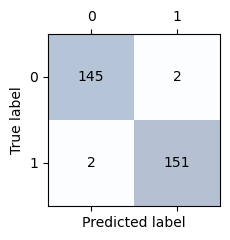

In [4]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# make_classification으로 data 생성 가능 
X, y= make_classification(
    n_samples=1000, n_features=2, n_informative=2,  # feature 2개 -> binary data형태
    n_redundant=0, n_clusters_per_class=1           # redundant=0 -> 노이즈 없게, clusters_per_class : class 당 cluster를 몇 개로 둘지
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

print("훈련 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}" .format(model.score(X_test, y_test)))

predict = model.predict(X_test) # test data에 대해서 얼만큼 예측을 했는지
print("정확도 : {}" .format(accuracy_score(y_test, predict)))

confmat = confusion_matrix(y_true=y_test, y_pred=predict)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]) :
    for j in range(confmat.shape[1]) :
        ax.text(x=j, y=i, s=confmat[i, j], ha='center', va='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

# (Predicted label, True label)   
#               (0, 0)           TN (True Negative  : 예측값을 Negative 값 0으로 예측했고, 실제 값도 Negative 값 0)
#               (0, 1)           FP (False Positive : 예측값을 Positive 값 1으로 예측했는데, 실제 값은 Negative 값 0) 
#               (1, 0)           FN (False Negative : 예측값을 Negative 값 0으로 예측했는데, 실제 값은 Positive 값 1)
#               (1, 1)           TP (True Positive  : 예측값을 Positive 값 1으로 예측했고, 실제 값도 Positive 값 1)


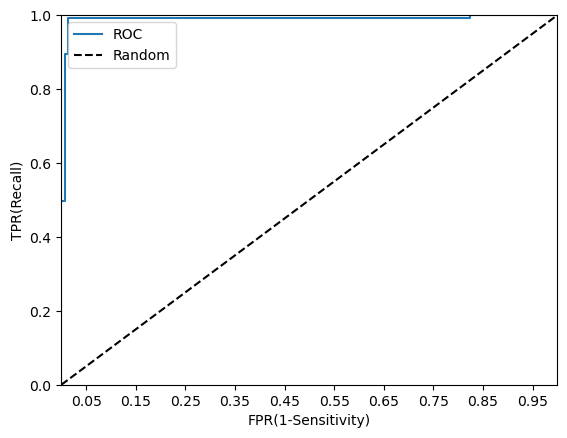

In [5]:
from sklearn.metrics import roc_curve
import numpy as np

pred_proba_class1 = model.predict_proba(X_test)[:, 1] # class가 1인 것에 대한 확률값
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

plt.plot(fprs, tprs, label='ROC')
plt.plot([0, 1], [0, 1], '--k', label='Random') # 이 선에 가까울수록 성능이 안좋은 것이다.
start, end = plt.xlim()

plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR(1-Sensitivity)') # 1-Sensitivity는 1-TNR과 같은 의미이다.
plt.ylabel('TPR(Recall)')
plt.legend();

In [6]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, predict)

print("ROC AUC Score : {}". format(roc_auc))

ROC AUC Score : 0.9866613311991463
